In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
X,y = make_blobs(n_samples=1000, n_features=2, centers= 3, random_state=23)

In [4]:
X

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

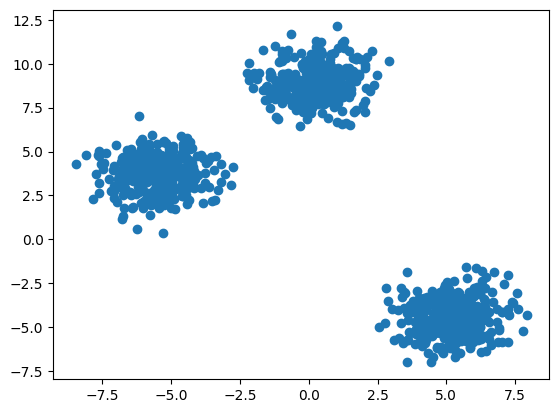

In [8]:
plt.scatter(X[:,0], X[:,1])

In [9]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest, ytrain,ytest = train_test_split(X,y , test_size=0.2, random_state=42)

In [10]:
Xtrain.shape, Xtest.shape

((800, 2), (200, 2))

In [11]:
from sklearn.cluster import KMeans

In [12]:
# Manual method by Elbow method

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')  # why we use k-means++? for no overlapping k-means++ use to set centroid far from each other
    kmeans.fit(Xtrain)
    wcss.append(kmeans.inertia_)

c:\Users\NEERAJ\Downloads\My Projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\NEERAJ\Downloads\My Projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\NEERAJ\Downloads\My Projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\NEERAJ\Downloads\My Projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

In [13]:
wcss

[41167.28340753901,
 9544.872623190913,
 1570.372399982784,
 1356.5604267781086,
 1182.8339673509954,
 1016.4960018982937,
 913.9550111429695,
 795.4530974980955,
 695.8556364593219,
 639.8651194290145]

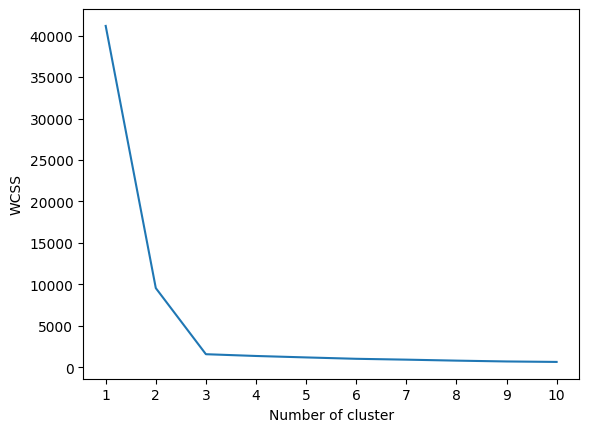

In [15]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [16]:
model = KMeans(n_clusters=3,init='k-means++')

In [17]:
y_label = model.fit_predict(Xtrain)

c:\Users\NEERAJ\Downloads\My Projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


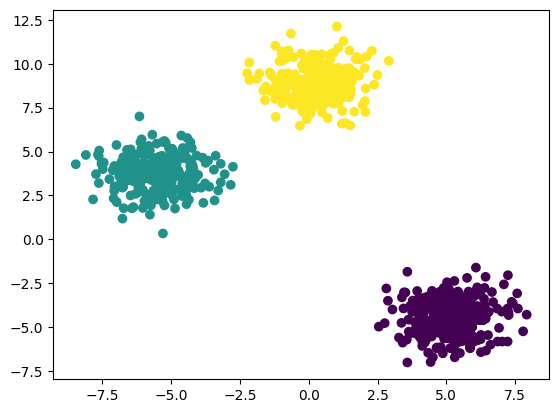

In [18]:
plt.scatter(Xtrain[:,0],Xtrain[:,1], c=y_label)

In [19]:
ytest_labaed = model.predict(Xtest)

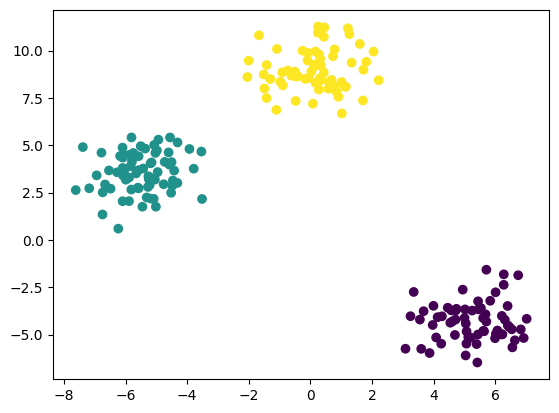

In [20]:
plt.scatter(Xtest[:,0], Xtest[:,1], c=ytest_labaed)

## Automate

In [21]:
## Knee Locater

In [23]:
from kneed import KneeLocator

In [25]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [26]:
# Perfomance Metrics

In [27]:
from sklearn.metrics import silhouette_score

In [34]:
silout_coef = []

for i in range(2,11):
    m_kmeans= KMeans(n_clusters=k, init='k-means++')
    m_kmeans.fit(Xtrain)
    
    score = silhouette_score(Xtrain,m_kmeans.labels_)
    silout_coef.append(score)

c:\Users\NEERAJ\Downloads\My Projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\NEERAJ\Downloads\My Projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\NEERAJ\Downloads\My Projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\NEERAJ\Downloads\My Projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

In [35]:
silout_coef

[0.3357410983064546,
 0.33966370452966943,
 0.3394903496104131,
 0.3396343804132458,
 0.3365032684607164,
 0.3354801642807131,
 0.3373883323702333,
 0.33814852757672725,
 0.326766507377194]